# Une régression logistique sur le jeu de données Iris

Petite manip bonus qui n'a rien à voir avec le sujet : afficher une photo d'iris en haut de ce notebook.

![Iris 2](https://jardinage.lemonde.fr/images/dossiers/historique/iris-2-114805.jpg)

## Importer les librairies

Vous aurez besoin de pandas, matplotlib, seaborn (et numpy ?)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Importer les données et commencer à explorer le dataset

In [34]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Analyse de données : visualisation

Faire apparaître sur une même figure (idéalement un même graphique !) la relation entre chaque feature et chaque espèce d'iris.

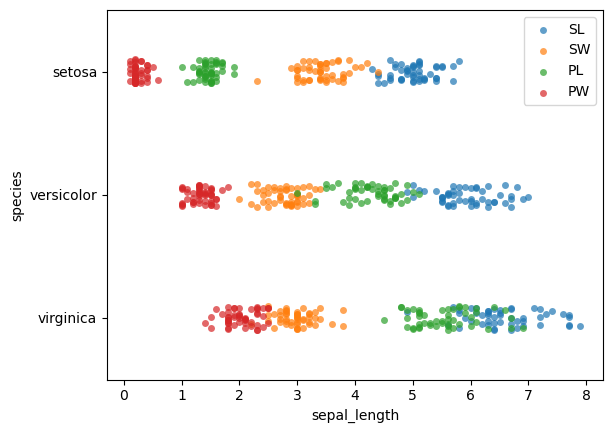

In [36]:
sns.stripplot(y='species', x='sepal_length', data=df, alpha=0.7, label='SL')
sns.stripplot(y='species', x='sepal_width', data=df, alpha=0.7, label='SW')
sns.stripplot(y='species', x='petal_length', data=df, alpha=0.7, label='PL')
sns.stripplot(y='species', x='petal_width', data=df, alpha=0.7, label='PW')
ax = plt.gca()
h, l = ax.get_legend_handles_labels()
ax.legend(h[::3],l[::3])
plt.show()

## Création d'un train set et test set

In [51]:
y = df.species
X = df.drop("species", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Création et entraînement du modèle

In [45]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

y_pred = logit.predict(X_test)
proba = logit.predict_proba(X_test)

In [46]:
y_pred, proba

(array(['setosa', 'virginica', 'versicolor', 'versicolor', 'setosa',
        'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
        'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
        'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
        'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
        'virginica', 'versicolor', 'setosa', 'virginica', 'setosa'],
       dtype=object),
 array([[9.85294781e-01, 1.47051731e-02, 4.63398607e-08],
        [1.37413049e-03, 3.90671999e-01, 6.07953870e-01],
        [1.86754058e-01, 8.09050934e-01, 4.19500714e-03],
        [1.55796381e-01, 8.39983975e-01, 4.21964367e-03],
        [9.88236682e-01, 1.17632829e-02, 3.55233450e-08],
        [4.37676353e-03, 6.88414910e-01, 3.07208327e-01],
        [9.95150311e-01, 4.84968360e-03, 5.40100223e-09],
        [9.38841826e-01, 6.11578690e-02, 3.05410953e-07],
        [1.99391761e-04, 1.70979856e-01, 8.28820752e-01],
        [1.35093185e-02, 7.35426943e-0

## Évaluation du modèle

In [47]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

In [48]:
accuracy_score(y_pred, y_test)

0.9666666666666667

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

